## 自己相関時間τのシステムサイズに対する振る舞い


In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from itertools import cycle

plt.style.use("ggplot")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

## Local update

In [2]:
def get_dataset(L)->list:
    seeds = [2022, 2023, 2024, 2025, 2026]
    datas = []
    for seed in seeds:
        data = np.loadtxt(f"../output/L{L}/seed{seed}/Energy_Magnetization_L{L}_T2.49_{seed}.dat")
        mag = data[:, 1]
        datas.append(mag)
    return datas

def get_dataset_80(L)->list:
    seeds = [2022, 2023, 2024, 2025, 2026, 2027]
    datas = []
    for seed in seeds:
        data = np.loadtxt(f"../output/L{L}/seed{seed}/Energy_Magnetization_L{L}_T2.49_{seed}.dat")
        mag = data[:, 1]
        datas.append(mag)
    return datas


In [3]:
def get_autcorrelation_func(mag_datas:list, burn_out)-> np.ndarray:
    Correlation_mags = []
    for mag in mag_datas:
        mag_ = mag[200:] #初期緩和の分を捨てる
        sum2 = (np.mean(mag_))**2
        C = np.zeros(5000) #自己相関関数を2000サンプル用意
        for t in range(5000):
            sum1 = 0
            N = mag_.shape[0]
            for t_ in range(N-t):
                sum1 += mag_[t_] * mag_[t_ + t]
            C[t] = (sum1 / (N-t)) - sum2
        Correlation_mags.append(C)
    mag_array = np.array(Correlation_mags)
    C_mcmc = np.mean(mag_array, axis=0)
    return C_mcmc

In [4]:
from scipy.optimize import curve_fit

def func(x, a):
    return -(1/a)*x

def get_autcorrelation_time(C, sample:int):
    x_data= np.arange(sample)
    y_data = np.log(C[:sample]/C[0])
    popt, pcov = curve_fit(func, x_data[1:], y_data[1:])
    popt = popt.round(2)
    return popt


In [6]:
datas_10 = get_dataset(10)
datas_20 = get_dataset(20)
datas_40 = get_dataset(40)
datas_60 = get_dataset(60)
datas_80 = get_dataset_80(80)

In [64]:
datas_80 = get_dataset_80(80)
C_80 = get_autcorrelation_func(datas_80)

In [161]:
C_10 = get_autcorrelation_func(datas_10)
C_20 = get_autcorrelation_func(datas_20)
C_40 = get_autcorrelation_func(datas_40)
C_60 = get_autcorrelation_func(datas_60)
C_80 = get_autcorrelation_func(datas_80)

KeyboardInterrupt: 

In [159]:
np.savetxt('../output/auto_correlations/local_update/Correlation_L10.dat', C_10, fmt='%.7f')
np.savetxt('../output/auto_correlations/local_update/Correlation_L20.dat', C_20, fmt='%.7f')
np.savetxt('../output/auto_correlations/local_update/Correlation_L40.dat', C_40, fmt='%.7f')
np.savetxt('../output/auto_correlations/local_update/Correlation_L60.dat', C_60, fmt='%.7f')
np.savetxt('../output/auto_correlations/local_update/Correlation_L80.dat', C_80, fmt='%.7f')

NameError: name 'C_10' is not defined

In [160]:
C_list = [C_10, C_20, C_40, C_60, C_80]
fig, axes = plt.subplots(nrows=len(C_list), ncols=1, figsize=(8, 30))
for i, C in enumerate(C_list):
    sns.lineplot(y=C[:1000],x=np.arange(1000) ,label="correlation_magnetization  T: 2.49", color='green', ax=axes[i])
    #plt.legend()
    #plt.xlabel('t [MCS]')
    #plt.ylabel('correlation')
    #plt.grid()
    #plt.show()

NameError: name 'C_10' is not defined

In [75]:
tau_10 = get_autcorrelation_time(C_10, 50)
tau_20 = get_autcorrelation_time(C_20, 225)
tau_40 = get_autcorrelation_time(C_40, 750)
tau_60 = get_autcorrelation_time(C_60, 2500)
tau_80 = get_autcorrelation_time(C_80, 2600)

In [76]:
print(f"autcorrelation_time L10:{tau_10}")
print(f"autcorrelation_time L20:{tau_20}")
print(f"autcorrelation_time L40:{tau_40}")
print(f"autcorrelation_time L60:{tau_60}")
print(f"autcorrelation_time L80:{tau_80}")

autcorrelation_time L10:[17.98]
autcorrelation_time L20:[74.11]
autcorrelation_time L40:[409.7]
autcorrelation_time L60:[996.87]
autcorrelation_time L80:[1873.16]


In [77]:
tau_list = [17, 74, 409, 996, 1873]
L_list = [10, 20, 40, 60, 80]

In [78]:
def func2(x, a, b):
    return b*(x**a)

x_data= np.array(L_list)
y_data = np.array(tau_list)
popt, pcov = curve_fit(func2, x_data, y_data)
print(popt)

[2.20821907 0.11761498]


/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_8719/521605683.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


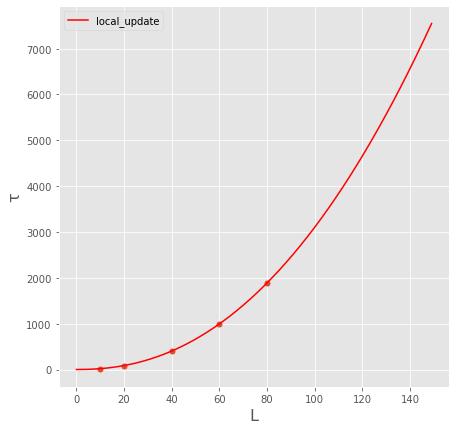

In [240]:
1

## Naive-Wolff

In [81]:
def get_dataset_wolff(L)->list:
    seeds = [2022, 2023, 2024, 2025, 2026]
    datas = []
    for seed in seeds:
        data = np.loadtxt(f"../output/L{L}/seed{seed}_wolff/Energy_Magnetization_L{L}_T2.49_{seed}.dat")
        mag = data[:, 1]
        datas.append(mag)
    return datas

In [83]:
datas_10_wolff = get_dataset_wolff(10)
datas_20_wolff = get_dataset_wolff(20)
datas_40_wolff = get_dataset_wolff(40)
datas_60_wolff = get_dataset_wolff(60)
datas_80_wolff = get_dataset_wolff(80)

In [84]:
C_10_wolff = get_autcorrelation_func(datas_10_wolff)
C_20_wolff = get_autcorrelation_func(datas_20_wolff)
C_40_wolff = get_autcorrelation_func(datas_40_wolff)
C_60_wolff = get_autcorrelation_func(datas_60_wolff)
C_80_wolff = get_autcorrelation_func(datas_80_wolff)

In [85]:
np.savetxt('../output/auto_correlations/naive_wolff/Correlation_L10.dat', C_10_wolff, fmt='%.7f')
np.savetxt('../output/auto_correlations/naive_wolff/Correlation_L20.dat', C_20_wolff, fmt='%.7f')
np.savetxt('../output/auto_correlations/naive_wolff/Correlation_L40.dat', C_40_wolff, fmt='%.7f')
np.savetxt('../output/auto_correlations/naive_wolff/Correlation_L60.dat', C_60_wolff, fmt='%.7f')
np.savetxt('../output/auto_correlations/naive_wolff/Correlation_L80.dat', C_80_wolff, fmt='%.7f')

In [ ]:
tau_10 = get_autcorrelation_time(C_10_wolff, 50)
tau_20 = get_autcorrelation_time(C_20_wolff, 225)
tau_40 = get_autcorrelation_time(C_40, 750)
tau_60 = get_autcorrelation_time(C_60, 2500)
tau_80 = get_autcorrelation_time(C_80, 2600)

## Self-learning update

In [ ]:
output/L80/seed2022_SLMC/Energy_Magnetization_L80_T2.49_2022.dat

In [100]:
def get_dataset_slmc(L)->list:
    seeds = [2022, 2023, 2024, 2025, 2026]
    datas = []
    for seed in seeds:
        data = np.loadtxt(f"../output/L{L}/seed{seed}_SLMC/Energy_Magnetization_L{L}_T2.49_{seed}.dat")
        mag = data[:, 1]
        datas.append(mag)
    return datas

In [75]:
def get_autcorrelation_func(mag_datas:list, burn_out)-> np.ndarray:
    Correlation_mags = []
    for mag in mag_datas:
        mag_ = mag[burn_out:] #初期緩和の分を捨てる
        sum2 = (np.mean(mag_))**2
        C = np.zeros(5000) #自己相関関数を2000サンプル用意
        for t in range(5000):
            sum1 = 0
            N = mag_.shape[0]
            for t_ in range(N-t):
                sum1 += mag_[t_] * mag_[t_ + t]
            C[t] = (sum1 / (N-t)) - sum2
        Correlation_mags.append(C)
    mag_array = np.array(Correlation_mags)
    C_mcmc = np.mean(mag_array, axis=0)
    return C_mcmc

In [6]:
datas_10_slmc = get_dataset_slmc(10)
datas_20_slmc = get_dataset_slmc(20)
datas_40_slmc = get_dataset_slmc(40)
datas_60_slmc = get_dataset_slmc(60)
datas_80_slmc = get_dataset_slmc(80)

In [101]:
datas_80 = get_dataset_slmc(80)
C_80 = get_autcorrelation_func(datas_80, 700)

In [76]:
datas_30 = get_dataset_slmc(30)
C_30 = get_autcorrelation_func(datas_30, 120)

In [77]:
datas_50 = get_dataset_slmc(50)
C_50 = get_autcorrelation_func(datas_50, 300)
datas_70 = get_dataset_slmc(70)
C_70 = get_autcorrelation_func(datas_70, 500)

In [11]:
datas_100_slmc = get_dataset_slmc(100)
C_100_slmc = get_autcorrelation_func(datas_100_slmc, 1000)

In [38]:
datas_120_slmc = get_dataset_slmc(120)
C_120_slmc = get_autcorrelation_func(datas_120_slmc, 2500)

In [46]:
datas_160_slmc = get_dataset_slmc(160)
C_160_slmc = get_autcorrelation_func(datas_160_slmc, 4000)

In [61]:
datas_200_slmc = get_dataset_slmc(200)
C_200_slmc = get_autcorrelation_func(datas_200_slmc, 7000)

In [7]:
C_10_slmc = get_autcorrelation_func(datas_10_slmc)
C_20_slmc = get_autcorrelation_func(datas_20_slmc)
C_40_slmc = get_autcorrelation_func(datas_40_slmc)
C_60_slmc = get_autcorrelation_func(datas_60_slmc)
C_80_slmc = get_autcorrelation_func(datas_80_slmc)

In [8]:
np.savetxt('../output/auto_correlations/slmc/Correlation_L10.dat', C_10_slmc, fmt='%.7f')
np.savetxt('../output/auto_correlations/slmc/Correlation_L20.dat', C_20_slmc, fmt='%.7f')
np.savetxt('../output/auto_correlations/slmc/Correlation_L40.dat', C_40_slmc, fmt='%.7f')
np.savetxt('../output/auto_correlations/slmc/Correlation_L60.dat', C_60_slmc, fmt='%.7f')
np.savetxt('../output/auto_correlations/slmc/Correlation_L80.dat', C_80_slmc, fmt='%.7f')

In [45]:
np.savetxt('../output/auto_correlations/slmc/Correlation_L100.dat', C_100_slmc, fmt='%.7f')
np.savetxt('../output/auto_correlations/slmc/Correlation_L120.dat', C_120_slmc, fmt='%.7f')

In [59]:
np.savetxt('../output/auto_correlations/slmc/Correlation_L160.dat', C_160_slmc, fmt='%.7f')

In [21]:
def get_autcorrelation_time(C, start, end):
    x_data= np.arange(start,end)
    y_data = np.log(C[start:end]/C[0])
    popt, pcov = curve_fit(func, x_data[1:], y_data[1:])
    popt = popt.round(2)
    return popt

No handles with labels found to put in legend.
/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_7647/1681310136.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


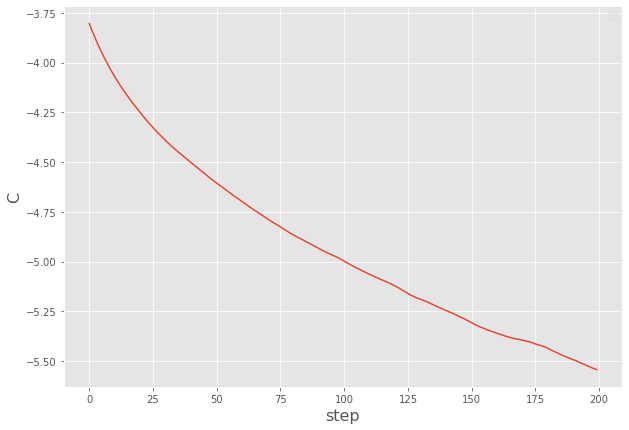

In [96]:
fig = plt.figure(figsize=(10, 7))
plt.plot(np.log(C_70[0:200]))
plt.xlabel('step', fontsize=16)
plt.ylabel('C', fontsize=16)
plt.legend()
fig.show()

In [97]:
tau_20_slmc = get_autcorrelation_time(C_70,50,  100)
print(f"autcorrelation_time L10:{tau_20_slmc}")

autcorrelation_time L10:[75.07]


No handles with labels found to put in legend.
/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_8719/796088570.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


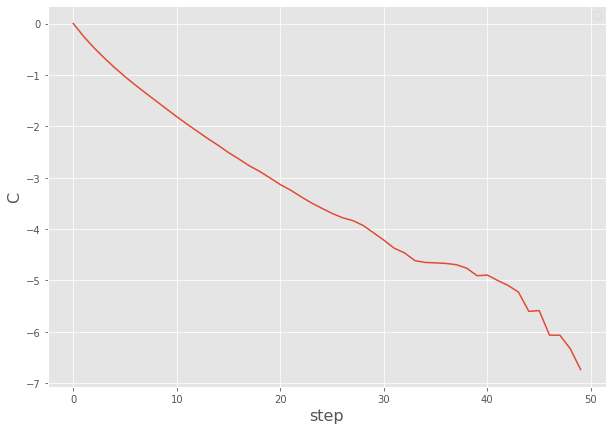

In [276]:
fig = plt.figure(figsize=(10, 7))
plt.plot(np.log(C_120_slmc[0:100]/C_20_slmc[0]))
plt.xlabel('step', fontsize=16)
plt.ylabel('C', fontsize=16)
plt.legend()
fig.show()

In [30]:
tau_20_slmc = get_autcorrelation_time(C_120_slmc, 200, 600)
print(f"autcorrelation_time L10:{tau_20_slmc}")

autcorrelation_time L10:[282.21]


No handles with labels found to put in legend.
/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_8719/1026924536.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


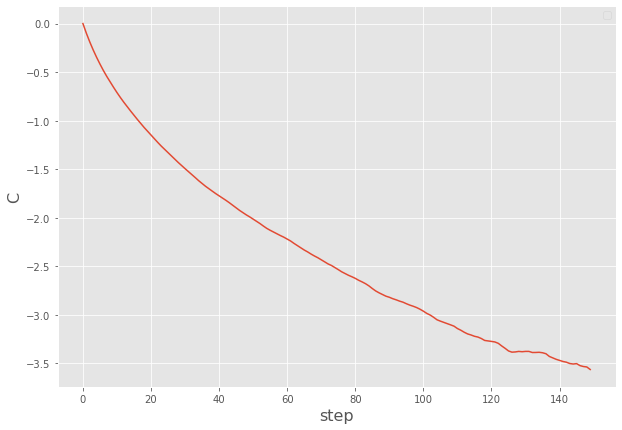

In [295]:
fig = plt.figure(figsize=(10, 7))
plt.plot(np.log(C_40_slmc[:150]/C_40_slmc[0]))
plt.xlabel('step', fontsize=16)
plt.ylabel('C', fontsize=16)
plt.legend()
fig.show()

No handles with labels found to put in legend.
/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_8719/3004915216.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


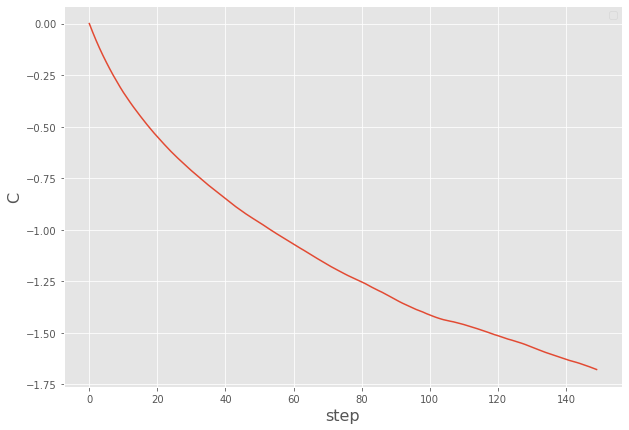

In [297]:
fig = plt.figure(figsize=(10, 7))
plt.plot(np.log(C_60_slmc[:150]/C_60_slmc[0]))
plt.xlabel('step', fontsize=16)
plt.ylabel('C', fontsize=16)
plt.legend()
fig.show()

No handles with labels found to put in legend.
/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_8719/386001904.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


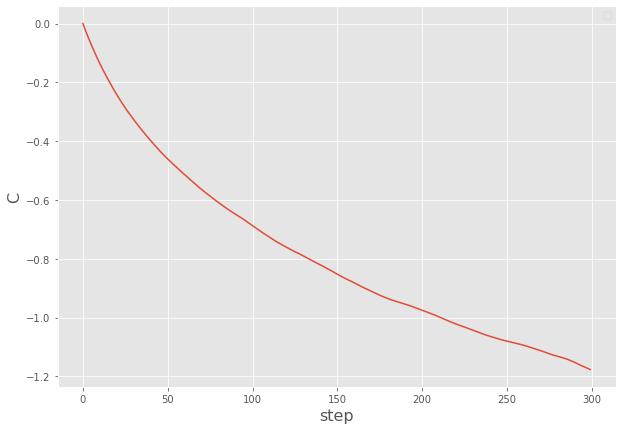

In [303]:
fig = plt.figure(figsize=(10, 7))
plt.plot(np.log(C_80_slmc[:300]/C_80_slmc[0]))
plt.xlabel('step', fontsize=16)
plt.ylabel('C', fontsize=16)
plt.legend()
fig.show()

In [310]:
def get_autcorrelation_time_(C, sample:int):
    x_data= np.arange(250)
    y_data = np.log(C[50:sample]/C[0])
    popt, pcov = curve_fit(func, x_data[1:], y_data[1:])
    popt = popt.round(2)
    return popt

In [315]:
tau_10_slmc = get_autcorrelation_time(C_10_slmc, 12)
print(f"autcorrelation_time L10:{tau_10_slmc}")
tau_20_slmc = get_autcorrelation_time(C_20_slmc, 25)
print(f"autcorrelation_time L20:{tau_20_slmc}")
tau_40_slmc = get_autcorrelation_time(C_40_slmc, 100)
print(f"autcorrelation_time L40:{tau_40_slmc}")
tau_60_slmc = get_autcorrelation_time(C_60_slmc, 140)
print(f"autcorrelation_time L60:{tau_60_slmc}")
tau_80_slmc = get_autcorrelation_time_(C_80_slmc, 300)
print(f"autcorrelation_time L80:{tau_80_slmc}")

autcorrelation_time L10:[3.01]
autcorrelation_time L20:[6.2]
autcorrelation_time L40:[28.69]
autcorrelation_time L60:[71.09]
autcorrelation_time L80:[166.7]


No handles with labels found to put in legend.
/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_8719/3609776605.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


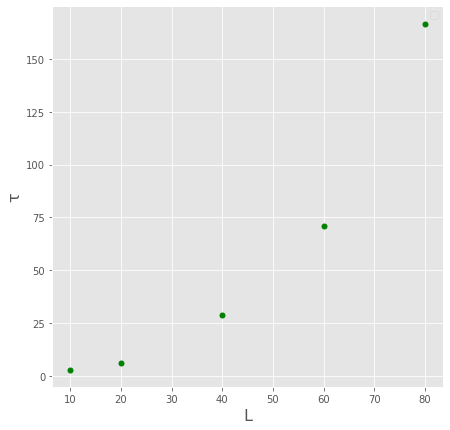

In [317]:
tau_list_slmc = [3.02, 6.2, 28.69, 71.09, 166.7]
fig = plt.figure(figsize=(7, 7))
plt.plot(L_list, tau_list_slmc, '.',markersize=10, color='green')
plt.xlabel('L', fontsize=16)
plt.ylabel('τ', fontsize=16)
plt.legend()
fig.show()

## Naive wolff

In [162]:
data = np.loadtxt('/Users/oritoyusuke/Desktop/graduate-research/output/L40/seed2022_wolff/Energy_Magnetization_L40_T2.49_2022.dat')
mag = data[:, 1]
mags = [mag]

In [163]:
C = get_autcorrelation_func(mags)

No handles with labels found to put in legend.
/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_3147/2716053592.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


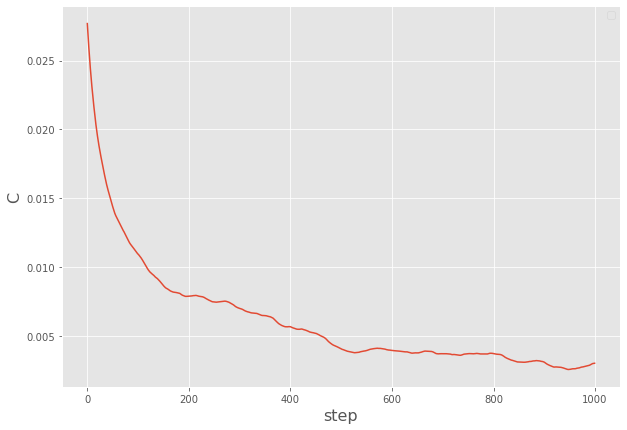

In [164]:
fig = plt.figure(figsize=(10, 7))
plt.plot(C[:1000])
plt.xlabel('step', fontsize=16)
plt.ylabel('C', fontsize=16)
plt.legend()
fig.show()

## Restricted Self-learning update

In [2]:
def get_dataset(L)->list:
    seeds = [2022, 2023, 2024, 2025, 2026]
    datas = []
    for seed in seeds:
        data = np.loadtxt(f"../output/L{L}/seed{seed}_restSLMC/energy_Mag_{seed}_2.49.dat")
        mag = data[:, 1]
        datas.append(mag)
    return datas

In [3]:
def get_dataset_slmc(L)->list:
    #seeds = [2022, 2023, 2024, 2025, 2026]
    seeds = [2025, 2026]
    datas = []
    for seed in seeds:
        data = np.loadtxt(f"../output/L{L}/seed{seed}_SLMC/energy_Mag_{seed}_2.49.dat")
        mag = data[:, 1]
        datas.append(mag)
    return datas

In [4]:
def get_autcorrelation_func(mag_datas:list, burn_out)-> np.ndarray:
    Correlation_mags = []
    for mag in mag_datas:
        mag_ = mag[burn_out:] #初期緩和の分を捨てる
        sum2 = (np.mean(mag_))**2
        C = np.zeros(5000) #自己相関関数を2000サンプル用意
        for t in range(5000):
            sum1 = 0
            N = mag_.shape[0]
            for t_ in range(N-t):
                sum1 += mag_[t_] * mag_[t_ + t]
            C[t] = (sum1 / (N-t)) - sum2
        Correlation_mags.append(C)
    mag_array = np.array(Correlation_mags)
    C_mcmc = np.mean(mag_array, axis=0)
    return C_mcmc

In [23]:
from scipy.optimize import curve_fit

def func(x, a):
    return -(1/a)*x

def get_autcorrelation_time(C, start, end):
    x_data= np.arange(start,end)
    y_data = np.log(C[start:end]/C[0])
    popt, pcov = curve_fit(func, x_data[1:], y_data[1:])
    popt = popt.round(2)
    return popt

In [7]:
datas_100 = get_dataset(100)
C_100 = get_autcorrelation_func(datas_100, 1500)

In [10]:
datas_120 = get_dataset(120)
C_120 = get_autcorrelation_func(datas_120, 1000)

In [20]:
C_160 =np.loadtxt('../output/auto_correlations/restSLMC/Correlation_L160.dat')

In [6]:
datas_200 = get_dataset(200)
C_200  = get_autcorrelation_func(datas_200, 3000)

In [7]:
datas_240 = get_dataset(240)
C_240  = get_autcorrelation_func(datas_240, 1000)

In [13]:
np.savetxt('../output/auto_correlations/restSLMC/Correlation_L100.dat', C_100, fmt='%.7f')

In [18]:
np.savetxt('../output/auto_correlations/restSLMC/Correlation_L120.dat', C_120, fmt='%.7f')

In [14]:
np.savetxt('../output/auto_correlations/restSLMC/Correlation_L160.dat', C_160, fmt='%.7f')

In [23]:
np.savetxt('../output/auto_correlations/restSLMC/Correlation_L200.dat', C_200, fmt='%.7f')
np.savetxt('../output/auto_correlations/restSLMC/Correlation_L240.dat', C_240, fmt='%.7f')

/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_31929/2393994908.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


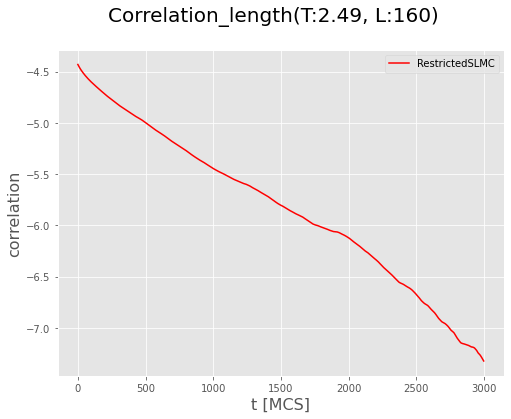

In [18]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.log(C_200[:3000]), label="RestrictedSLMC", color='red')
#plt.plot(C_200_[:4000],label="SLMC", color='blue')
plt.legend()
plt.xlabel('t [MCS]', fontsize=16)
plt.ylabel('correlation', fontsize=16)
plt.suptitle('Correlation_length(T:2.49, L:160)', fontsize=20)
fig.show()

/var/folders/nm/f1mftswx2bn4x3l5cmqskq5r0000gn/T/ipykernel_34496/3043393382.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


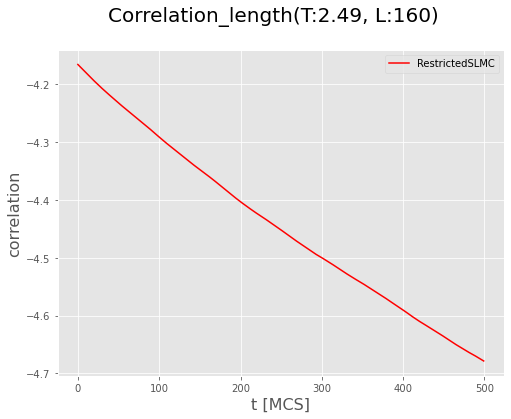

In [22]:
fig = plt.figure(figsize=(8,6))
plt.plot(np.log(C_160[100:600]), label="RestrictedSLMC", color='red')
#plt.plot(C_200_[:4000],label="SLMC", color='blue')
plt.legend()
plt.xlabel('t [MCS]', fontsize=16)
plt.ylabel('correlation', fontsize=16)
plt.suptitle('Correlation_length(T:2.49, L:160)', fontsize=20)
fig.show()

In [26]:
tau_200 = get_autcorrelation_time(C_100, 100, 200)
#tau_240 = get_autcorrelation_time(C_240, 200, 3000)
print(f"autcorrelation_time L10:{tau_200}")
print(f"autcorrelation_time L10:{tau_240}")

autcorrelation_time L10:[222.11]


NameError: name 'tau_240' is not defined